<a id = "1" ></a>
# <span style="color:#0F52BA;font-family:serif;">1. Introduction </span>

This data set consists of the marks secured by the students in various subjects.
Let's try to understand the influence of the parents background, test preparation etc on students performance.

<a id = "introduction" ></a>

<a id = "3" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Loading libraries and data</span>
 <a id="loading"></a>

In [2]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

ModuleNotFoundError: No module named 'missingno'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<a id = "4" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Quick look at the data</span>
<a id = "quicklook" ></a>

In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<a id = "5" ></a>
Let's take a look at our data
<a id = "dflook" ></a>

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualize missing values </span>
<a id = "missingvalue" ></a>

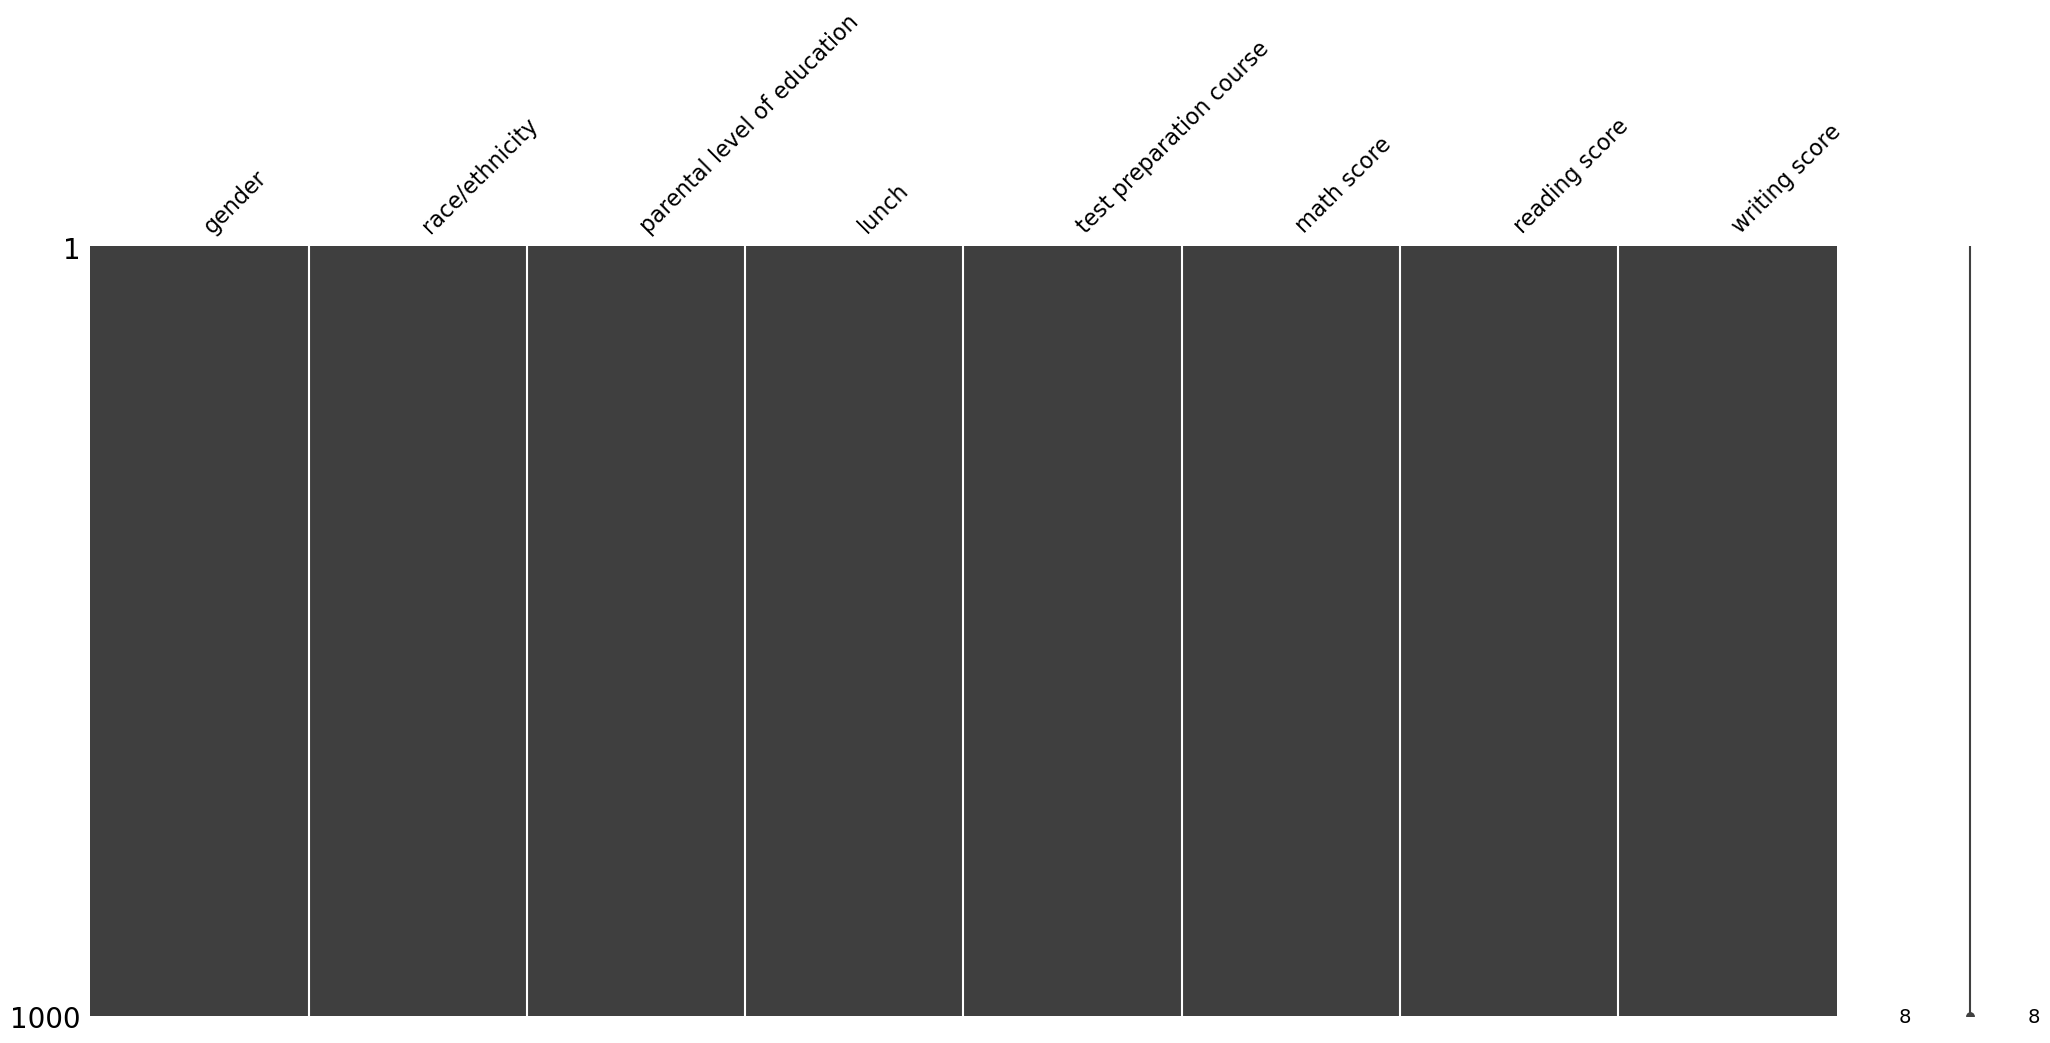

In [12]:
msno.matrix(df);

> **Using this matrix you can very quickly find the pattern of missingness in the dataset.
From the above visualisation we can observe that no peculiar pattern can be found!**

In [13]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

> **There are no missing values in our dataset!**

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Data Preperation </span>
<a id = "8" ></a>

For a particular course, the total marks is 100. So let's set passmark has 35 marks.

In [15]:
#initializing the passmarks
passmark=35

<a id = "9" ></a>
Let's create  three new columns: `Total_Marks`, `Percentage` and `grade`
<a id = "9" ></a>

In [16]:
 
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

In [27]:

def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,A
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,D
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,C
998,female,group D,some college,standard,completed,68,78,77,74.333333,B


In [34]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B


<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Visualization </span>
<a id = "datavisualization" ></a>

In [20]:
sns.set(style='whitegrid')

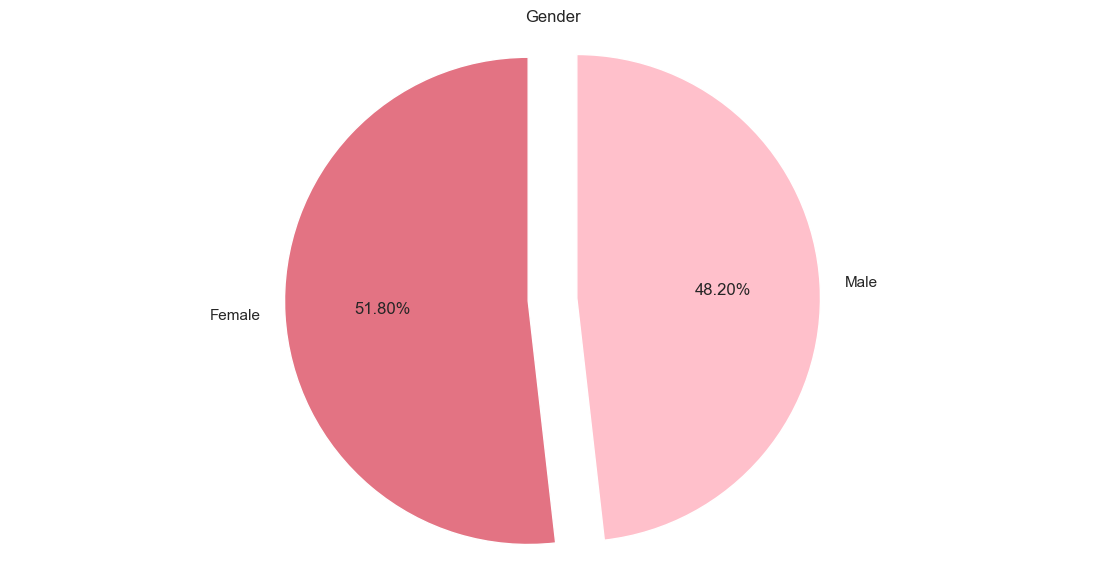

In [21]:
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

* Out of the total number of students, 51.89% are females while 48.20% are males.
 

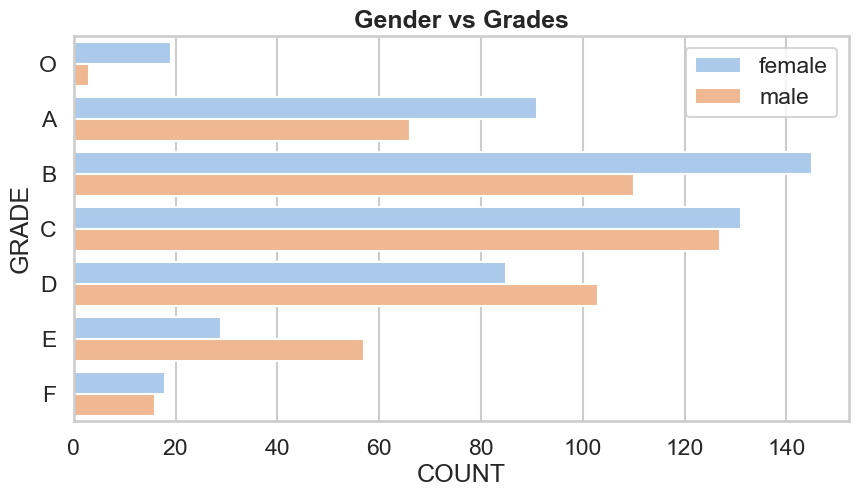

In [22]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

From the above visualization we infer:
* The majority of students who earned an O grade were female.
* Majority of students received B grade followed by C.
* More female students received A and B Grade relative to male students.
* More number of boys received D and E grade.
* Almost similar number of both, male and female, got F grade.

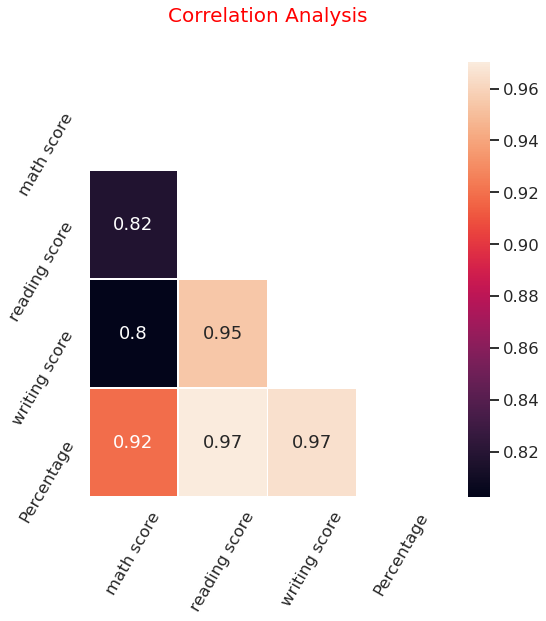

In [19]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

* We can see the relationship between reading and mathematical score and their gender distribution.